Bend a flat grid with a polynomial function and show how the grid
position, rotate and bending can be inferred with `ModelSurface` even
if we only know a limited number of points.

In [1]:
%matplotlib notebook
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from ecoggui import ModelSurface

# Generate a grid of 6 x 6 points
n_samples = 6 ** 2
x, y = np.meshgrid(np.linspace(0, 1., np.sqrt(n_samples)),
                   np.linspace(0, 1., np.sqrt(n_samples)))
x, y = np.reshape(x, -1), np.reshape(y, -1)
grid = np.vstack((x, y)).T

# curve it in 3D
z = -.2 * y + .1 * x ** 2  # curve surface
surface_true = np.vstack((x, y, z)).T

In [2]:
# Setup fitting model
# Here alpha controls the constrain on local distance
model = ModelSurface(alpha=.1, verbose=False)

# Let's say we only know 4 point, can we fit the entire surface_
# Check by yourself how the precisions increases with more points and with
# more spread apart points.
np.random.seed(2)
known_idx = np.random.randint(0, n_samples, 4)
model.fit(grid, surface_true[known_idx], idx=known_idx)
surface_pred = model.predict(grid)

Optimization terminated successfully.
         Current function value: 0.005436
         Iterations: 36
         Function evaluations: 1568
         Gradient evaluations: 49


<IPython.core.display.Javascript object>


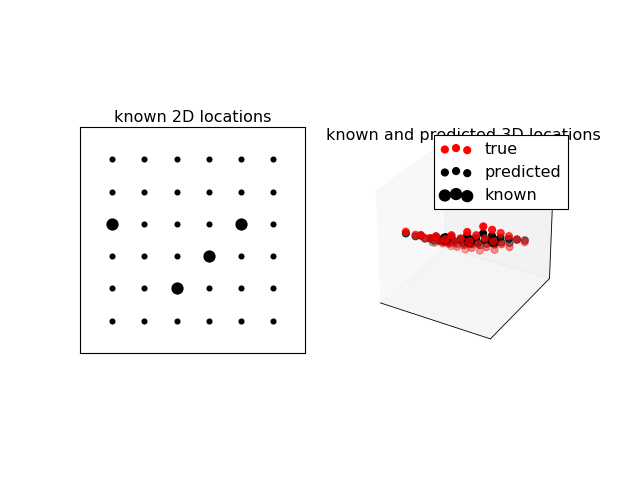

In [3]:
# Plot
fig = plt.figure(figsize=[8, 6])
ax = fig.add_subplot(121, aspect='equal')
ax.scatter(grid[:, 0], grid[:, 1], s=20, color='k')
ax.scatter(grid[known_idx, 0], grid[known_idx, 1], s=100, color='k')
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('known 2D locations')

ax = fig.add_subplot(122, projection='3d', aspect='equal')
for surf, color in zip((surface_true, surface_pred), ('r', 'k')):
    ax.scatter(*surf.T, s=40, c=color, color=color, facecolor=color)
    pass
ax.scatter(*surface_true[known_idx].T, s=100, c='k', color='k', facecolor='k')
ax.legend(['true', 'predicted', 'known'])
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_title('known and predicted 3D locations')
plt.show()

Note the difference between the fit and the truth. This can be explained
* because there isn't enough data (change n_known to see how this changes)
* because we impose a distance constrain which may not be respected by the polynomial transform, which takes the surface_true as if it was elastic.
